In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.nonparametric.api as smnp
from sklearn.linear_model import LinearRegression

In [10]:
cxt=pd.read_csv('data/cxtupdatearrayfmri.csv', index_col=[0], usecols=['sub', 'cond', 'cxt', 'block', 'response', 'RT', 
                                                                  'updatedistraw', 'luredistfix', 'distfix'])

In [12]:
cxt_short=pd.read_csv('data/cxtupdateEPIyoungold.csv', index_col=[0], usecols=['sub', 'cond', 'recogcxt', 'subgroup', 
                                                                          'block', 'response', 'RT', 'updatedistraw', 
                                                                          'luredistfix', 'distfix'])

In [13]:
cxt_short.rename(columns={'recogcxt':'cxt'}, inplace=True)

In [14]:
cxt_short=cxt_short[cxt_short['subgroup']=='young']

In [15]:
cxt['cxt']=cxt['cxt'].map({'Cxt A':0, 'Cxt B':1})
cxt_short['cxt']=cxt_short['cxt'].map({'Cxt1':0, 'Cxt2':1})

In [16]:
cxt_short.drop('subgroup', axis=1, inplace=True)

In [17]:
cxt=cxt.append(cxt_short)

In [18]:
cxt['exp_screen_size']=cxt.index<800

In [19]:
cxt['exp_screen_size']=cxt['exp_screen_size'].map({True:0, False:1})
cxt['cond']=cxt['cond'].map({'active':0, 'passive':1})

In [20]:
cxt=cxt[cxt['distfix']==1]
cxt=cxt[cxt['response']>0]
cxt=cxt[cxt['RT']<20000]

cxt.shape

(4752, 9)

In [21]:
act=cxt[cxt['cond']==0]
pas=cxt[cxt['cond']==1]

In [22]:
counts=pd.DataFrame(cxt.groupby(['sub', 'cond','cxt'])['response'].count())
counts.reset_index(inplace=True)
counts

,sub,cond,cxt,response
0,401,0,0,28
1,401,0,1,28
2,401,1,0,40
3,401,1,1,41
4,402,0,0,35
5,402,0,1,35
6,402,1,0,40
7,402,1,1,42
8,403,0,0,37
9,403,0,1,36


In [23]:
response=cxt.groupby(['sub', 'cond', 'cxt', 'response'])
tmp=pd.DataFrame()
for ind, row in response:
    count=row['response'].count()
    if ind[1]==0:
        if ind[2]==0:
            tmp.loc[ind[0],ind[3]]=count
        else:
            tmp.loc[ind[0],ind[3]+3]=count    
    else:
        if ind[2]==0:
            tmp.loc[ind[0],ind[3]+6]=count
        else:
            tmp.loc[ind[0],ind[3]+9]=count    

In [24]:
tmp.rename(columns={1:'act_cxt0_loc1', 2:'act_cxt0_loc2', 3:'act_cxt0_loc3',
                   4:'act_cxt1_loc1', 5:'act_cxt1_loc2', 6:'act_cxt1_loc3',
                   7:'pas_cxt0_loc1', 8:'pas_cxt0_loc2', 9:'pas_cxt0_loc3',
                   10:'pas_cxt1_loc1', 11:'pas_cxt1_loc2', 12:'pas_cxt1_loc3'}, inplace=True)

In [25]:
tmp.fillna(value=0, inplace=True)

act0=['act_cxt0_loc1', 'act_cxt0_loc2', 'act_cxt0_loc3']
act1=['act_cxt1_loc1', 'act_cxt1_loc2', 'act_cxt1_loc3']
pas0=['pas_cxt0_loc1', 'pas_cxt0_loc2', 'pas_cxt0_loc3']
pas1=['pas_cxt1_loc1', 'pas_cxt1_loc2', 'pas_cxt1_loc3']

tmp['act_cxt0_all']=tmp[act0].sum(axis=1)
tmp['act_cxt1_all']=tmp[act1].sum(axis=1)
tmp['pas_cxt0_all']=tmp[pas0].sum(axis=1)
tmp['pas_cxt1_all']=tmp[pas1].sum(axis=1)

In [26]:
tmp

,act_cxt0_loc1,act_cxt0_loc2,act_cxt1_loc1,act_cxt1_loc2,act_cxt1_loc3,pas_cxt0_loc1,pas_cxt0_loc2,pas_cxt0_loc3,pas_cxt1_loc1,pas_cxt1_loc2,pas_cxt1_loc3,act_cxt0_loc3,act_cxt0_all,act_cxt1_all,pas_cxt0_all,pas_cxt1_all
401,20.0,8.0,12.0,12.0,4.0,23.0,10.0,7.0,24.0,16.0,1.0,0.0,28.0,28.0,40.0,41.0
402,5.0,25.0,4.0,24.0,7.0,25.0,10.0,5.0,23.0,12.0,7.0,5.0,35.0,35.0,40.0,42.0
403,16.0,14.0,7.0,22.0,7.0,15.0,13.0,13.0,7.0,18.0,13.0,7.0,37.0,36.0,41.0,38.0
404,13.0,19.0,8.0,26.0,5.0,19.0,8.0,13.0,17.0,11.0,12.0,8.0,40.0,39.0,40.0,40.0
405,14.0,12.0,6.0,28.0,4.0,23.0,10.0,7.0,32.0,7.0,3.0,10.0,36.0,38.0,40.0,42.0
406,8.0,21.0,11.0,20.0,8.0,17.0,15.0,10.0,16.0,11.0,15.0,11.0,40.0,39.0,42.0,42.0
407,16.0,14.0,6.0,23.0,8.0,16.0,12.0,13.0,10.0,14.0,12.0,8.0,38.0,37.0,41.0,36.0
408,7.0,23.0,7.0,23.0,5.0,25.0,8.0,9.0,20.0,12.0,10.0,5.0,35.0,35.0,42.0,42.0
409,12.0,14.0,10.0,18.0,9.0,13.0,13.0,15.0,17.0,7.0,14.0,11.0,37.0,37.0,41.0,38.0
410,4.0,8.0,6.0,10.0,5.0,13.0,11.0,16.0,12.0,14.0,14.0,8.0,20.0,21.0,40.0,40.0


In [27]:
def get_prop(response_counts):
    widedf=pd.DataFrame()
    tidydf=pd.DataFrame()
    longdf=pd.DataFrame()

    for cond in ['act', 'pas']:
        for cxt in [0, 1]:
            for loc in [1, 2, 3]:
                col=f'{cond}_cxt{cxt}_loc{loc}'
                total_col=f'{cond}_cxt{cxt}_all'
                widedf[col]=response_counts[col]/response_counts[total_col]
                
                longdf['prop']=response_counts[col]/response_counts[total_col]
                longdf['locs']=loc
                longdf['cxt']=cxt
                longdf['cond']=cond
                tidydf=tidydf.append(longdf)
        return widedf, tidydf


props_wide, props_tidy=get_prop(tmp)

props_tidy

,prop,locs,cxt,cond
401,0.714286,1,0,act
402,0.142857,1,0,act
403,0.432432,1,0,act
404,0.325000,1,0,act
405,0.388889,1,0,act
406,0.200000,1,0,act
407,0.421053,1,0,act
408,0.200000,1,0,act
409,0.324324,1,0,act
410,0.200000,1,0,act


In [40]:
def get_prop_tidy(condlist, condname, tmp, cxt, cond):
    newdf=pd.DataFrame()
    props=pd.DataFrame()
    for cond in ['act', 'pas']:
        for cxt in [0,1]:
            for loc in range(1,4):
                col=f'{cond}_cxt{cxt}_loc{loc}'
                total_col=f'{cond}_cxt{cxt}_all'
                newdf['prop']=response_counts[]
    for ind, col in enumerate(condlist):
        newdf['prop']=tmp[col]/tmp[condname +'_all']
        newdf['locs']=ind+1
        newdf['cxt']=cxt
        newdf['cond']=cond
        props=props.append(newdf)
    return props

act0_prop=get_prop_tidy(act0, 'act_cxt0', tmp, 0, 'act')
act1_prop=get_prop_tidy(act1, 'act_cxt1', tmp, 1, 'act')
pas0_prop=get_prop_tidy(pas0, 'pas_cxt0', tmp, 0, 'pas')
pas1_prop=get_prop_tidy(pas1, 'pas_cxt1', tmp, 1, 'pas')

props_tidy=act0_prop.append([act1_prop, pas0_prop, pas1_prop])

SyntaxError: invalid syntax (<ipython-input-40-d63113c9eecf>, line 11)

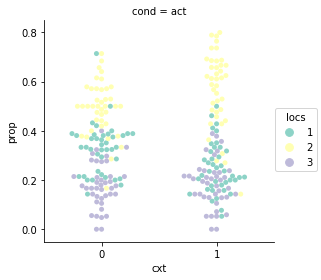

In [36]:
sns.factorplot(x='cxt', y='prop', hue='locs', col='cond', data=props_tidy, kind='swarm', palette='Set3')

In [38]:
viosplit=sns.violinplot(x='locs', y='prop', hue='cond', split=True,  data=props_tidy, palette='Pastel2')
plt.xticks((0,1,2),['Original', 'Update', 'Lure'])
plt.ylabel('Proportion of Responses')
plt.xlabel('Location Selection')
viosplit=viosplit.get_figure()
viosplit.savefig('cxt_viosplit.png')

ValueError: There must be exactly two hue levels to use `split`.'

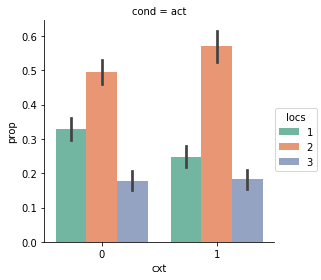

In [39]:
sns.factorplot(x='cxt', y='prop', hue='locs', col='cond', data=props_tidy, kind='bar', palette='Set2')

In [16]:
y_act=act['response']
X_act=act.drop(['response', 'cond'], axis=1)

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X_act,y_act, test_size=.3)
forest=RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
forest.predict(X_test)
forest.score(X_test, y_test)

0.5564263322884012

In [18]:
forest.predict(X_test)

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [20]:
scores=list(zip(X_act.columns, forest.feature_importances_))
scores=pd.Series(data=forest.feature_importances_, index=X_act.columns)
scores=scores.sort_values(ascending=False)
scores

updatedistraw      0.421257
RT                 0.317161
block              0.135925
cxt                0.067696
exp_screen_size    0.038786
luredistfix        0.019175
distfix            0.000000
dtype: float64

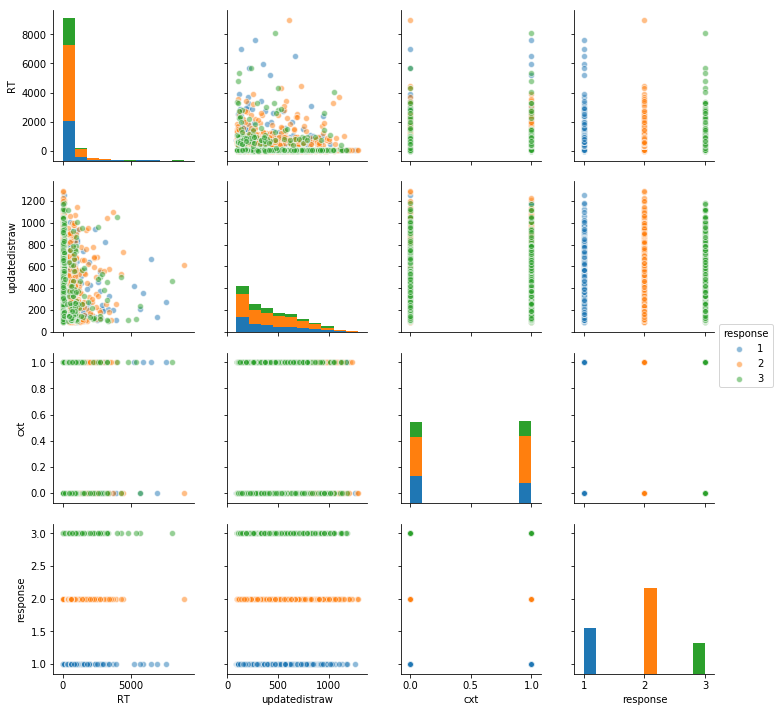

In [25]:
sns.pairplot(data=act[['RT', 'updatedistraw','cxt', 'response']], plot_kws={'alpha':.5}, hue='response')

In [34]:
y_pas=pas['response']
X_pas=pas.drop(['response', 'cond'], axis=1)

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X_pas,y_pas, test_size=.3)
forest=RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
forest.predict(X_test)
forest.score(X_test, y_test)

0.48350253807106597

In [37]:
forest.predict(X_test)

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,

In [36]:
scores=list(zip(X_pas.columns, forest.feature_importances_))
scores=pd.Series(data=forest.feature_importances_, index=X_pas.columns)
scores=scores.sort_values(ascending=False)
scores

RT                 0.389179
updatedistraw      0.341136
block              0.109801
exp_screen_size    0.073902
cxt                0.068095
luredistfix        0.017887
distfix            0.000000
dtype: float64

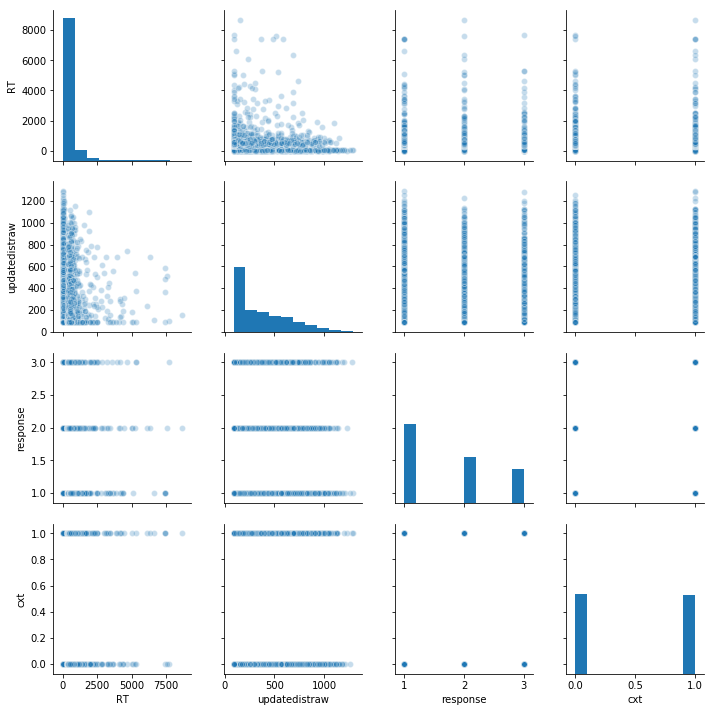

In [38]:
sns.pairplot(data=pas[['RT', 'updatedistraw', 'response', 'cxt']], plot_kws={'alpha':.25})